# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import requests
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aldinga beach
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | puerto lopez
Processing Record 5 of Set 1 | vallenar
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | susuman
Processing Record 11 of Set 1 | vanimo
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | tadine
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | fray luis beltran
Processing Record 18 of Set 1 | yangor
City not found. Skipping...
Processing Record 19 of Set 1 | eraan
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Se

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", "Lat", "Lng", "Max Temp", 
                                                "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aldinga beach,-35.2793,138.4604,16.35,91,99,8.63,AU,1691095953
1,castillos,-34.1667,-53.8333,9.85,59,100,2.67,UY,1691095954
2,puerto natales,-51.7236,-72.4875,3.60,95,100,10.16,CL,1691095903
3,puerto lopez,4.0845,-72.9560,30.67,63,9,1.86,CO,1691095955
4,vallenar,-28.5708,-70.7581,22.75,43,6,1.99,CL,1691095955


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aldinga beach,-35.2793,138.4604,16.35,91,99,8.63,AU,1691095953
1,castillos,-34.1667,-53.8333,9.85,59,100,2.67,UY,1691095954
2,puerto natales,-51.7236,-72.4875,3.60,95,100,10.16,CL,1691095903
3,puerto lopez,4.0845,-72.9560,30.67,63,9,1.86,CO,1691095955
4,vallenar,-28.5708,-70.7581,22.75,43,6,1.99,CL,1691095955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

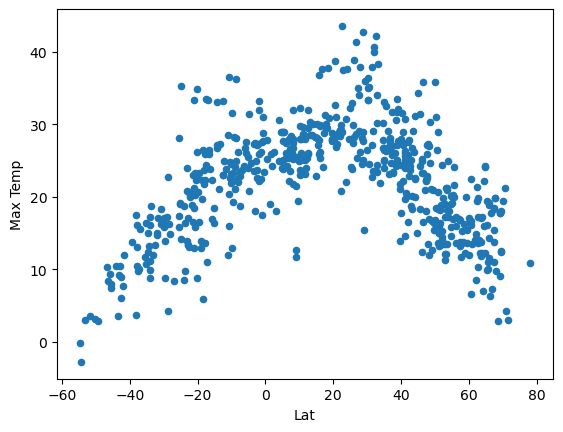

In [34]:
# Build scatter plot for latitude vs. temperature
#plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

lat_vs_temp = city_data_df.plot("Lat", "Max Temp", kind="scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

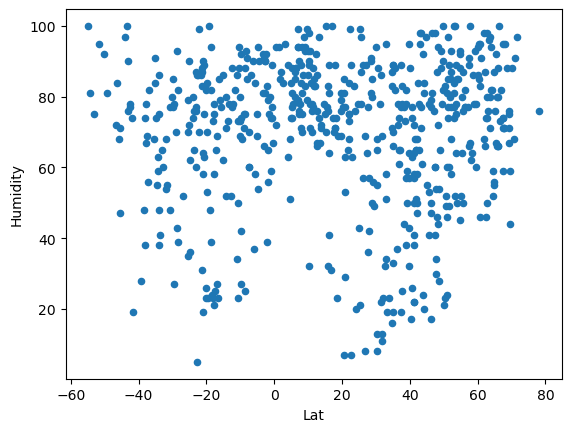

In [35]:
# Build the scatter plots for latitude vs. humidity
#plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

lat_vs_humidity = city_data_df.plot("Lat", "Humidity", kind="scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

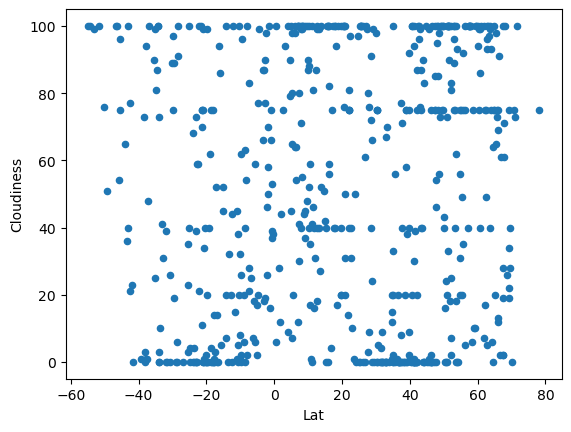

In [36]:
# Build the scatter plots for latitude vs. cloudiness
#plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

lat_vs_cloudiness = city_data_df.plot("Lat", "Cloudiness", kind="scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

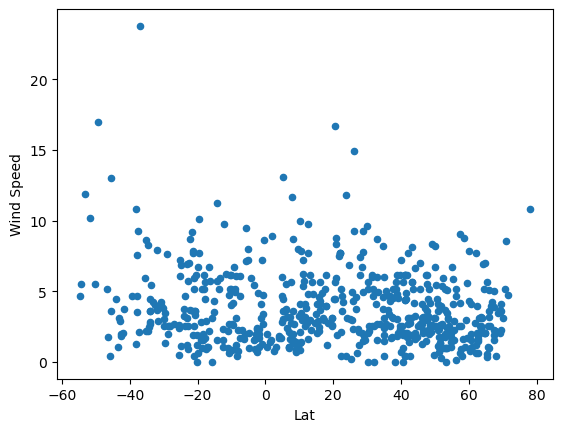

In [37]:
# Build the scatter plots for latitude vs. wind speed
#plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

lat_vs_wind_speed = city_data_df.plot("Lat", "Wind Speed", kind="scatter")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots

def create_lin_regress(x, y):
    corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(x, y)
    corr_fit = x * corr_slope + corr_int

    plt.scatter(x, y)
    plt.plot(x, corr_fit)
    

    #plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto lopez,4.0845,-72.9560,30.67,63,9,1.86,CO,1691095955
7,aasiaat,68.7098,-52.8699,2.83,88,26,3.47,GL,1691095956
8,vernon,50.2581,-119.2691,30.97,23,0,2.57,CA,1691095957
9,susuman,62.7833,148.1667,10.25,50,100,1.61,RU,1691095958
12,stanley,54.8680,-1.6985,14.52,92,75,1.03,GB,1691095859


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aldinga beach,-35.2793,138.4604,16.35,91,99,8.63,AU,1691095953
1,castillos,-34.1667,-53.8333,9.85,59,100,2.67,UY,1691095954
2,puerto natales,-51.7236,-72.4875,3.60,95,100,10.16,CL,1691095903
4,vallenar,-28.5708,-70.7581,22.75,43,6,1.99,CL,1691095955
5,ushuaia,-54.8000,-68.3000,-0.19,100,100,4.63,AR,1691095956


###  Temperature vs. Latitude Linear Regression Plot

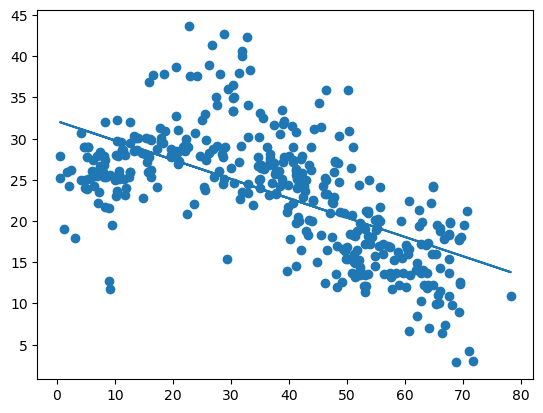

In [41]:
# Linear regression on Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

#plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.show()

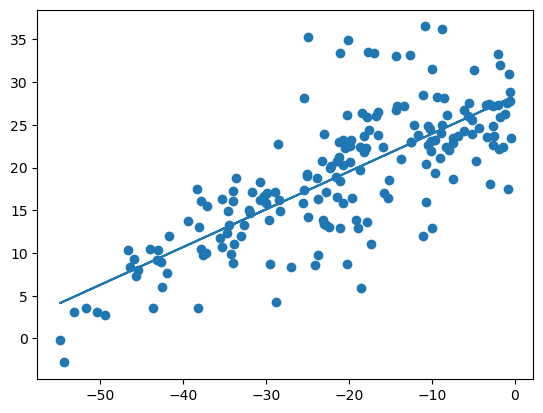

In [42]:
# Linear regression on Southern Hemisphere
create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

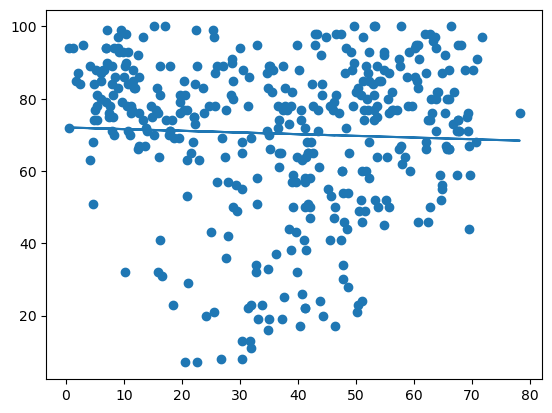

In [43]:
# Northern Hemisphere
create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.show()

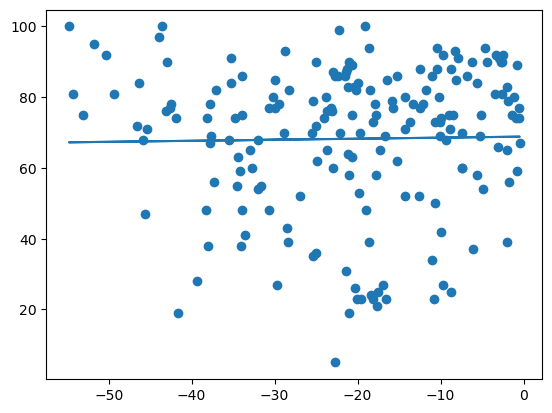

In [44]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

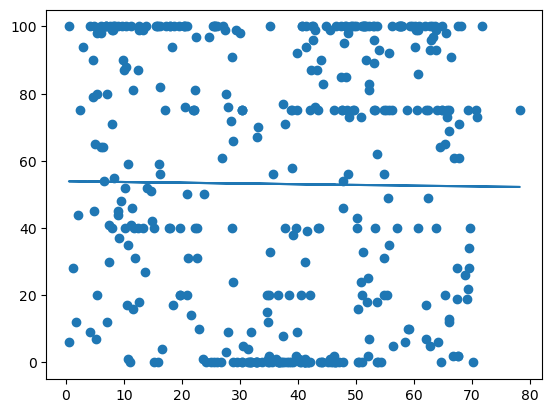

In [45]:
# Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.show()

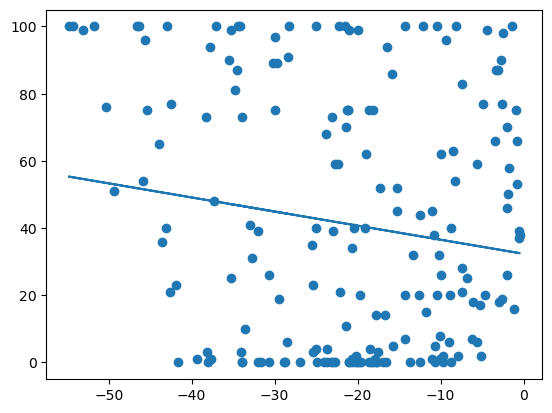

In [46]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

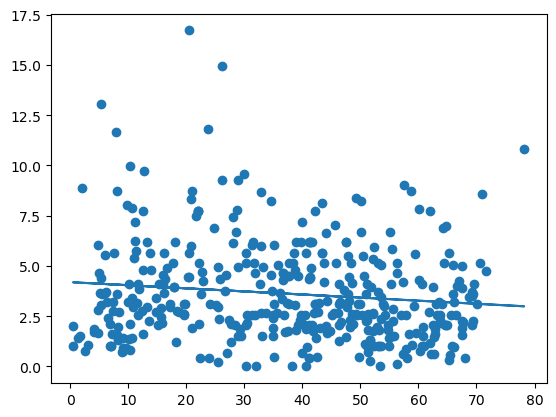

In [47]:
# Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.show()

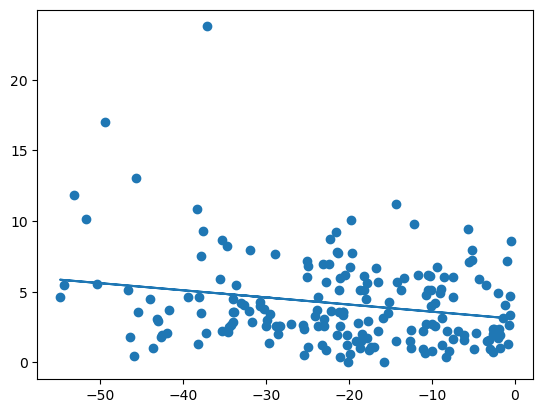

In [48]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE